# Stephen Curry's influence on Golden State Warriors(GSW) Performance

## Introduction

### Research Questions:
1. How had the win rate of GSW changed throughout the 2003-2021 period, and what is difference between GSW(2015) and GSW(2019) in average points per game?
2. What is the relationship between the mean game-time of Steph Carry and win-rate of GSW for each season between 2009-2021?
3. How had the trend of average 3-point field goal(%) adjusted from 2014 to 2021 for Golden State Warriors and Cleveland, and what is difference between GSW(2015) and GSW(2019) in 3-point field goal(%)

### Data Description:

NBA games data was chosen for giving answers for this research questions. This data consists of 5 datasets, where only 4 datasets were used:

* games.csv : all games from 2004 season to last update with the date, teams and some details like number of points, etc.
* games_details.csv : details of games dataset, all statistics of players for a given game
* ranking.csv : ranking of NBA given a day (split into west and east on CONFERENCE column)
* teams.csv : all teams of NBA

All 4 datasets were taken from kaggle.com(https://www.kaggle.com/datasets/nathanlauga/nba-games), while the author used the https://www.nba.com/stats/ to collect these 5 datasets.
For each Dataset, we have used these feature variables:

* games.csv:
        'GAME_DATE_EST' - Game Date
        'GAME_ID' - Game unique ID
        'HOME_TEAM_ID'- Home Team ID 
        'VISITOR_TEAM_ID' - Visitor Team ID 
        'SEASON' - Season Year
        'PTS_home' - Overall Points Scored by Home Team for a game
        'PTS_away' - Overall Points Scored by Visitor Team for a game 
        'FG3_PCT_home' - Home Team three-point field goal percentage(%)
        'FG3_PCT_away' - Visitor Team three-point field goal percentage(%)
        
* games_details.csv :
        'GAME_ID' - Game unique ID
        'PLAYER_NAME'  - Player Full Name
        'MIN' - Player game play time (in mm:ss)
        'PTS' - Player game scored points

* ranking.csv : ranking of NBA given a day (split into west and east on CONFERENCE column)
        'TEAM' - Team Name
        'SEASON_ID' - ID for each season year(ID divides each Season Year for active and inactive part)
        'W_PCT' - Win Rate Percentage(%)
   
* teams.csv : all teams of NBA
        'TEAM_ID' - Team ID
        'CITY' - Home City of Team


### Main Body

**Importing the required libraries**

In [ ]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
warnings.filterwarnings("ignore")
import scipy.stats as stats

**Importing the reqired datasets**

In [1056]:
games = pd.read_csv('games.csv')
games_det = pd.read_csv('games_details.csv')
ranking = pd.read_csv('ranking.csv')
teams = pd.read_csv('teams.csv')

1. **How had the win rate of GSW changed throughout the 2003-2021 period, and what is difference between GSW(2015) and GSW(2019) in Average points per game(PPG)?**

To answer this question I decided to plot the two subplots, where the first one will show the Win Rate of GSW throughout the 2003-2021 period and the second one will show the GSW average PPG for the same period. To prepare the data for such graphic, I mainly applied groupby function on 'SEASON' feature variable. 

In [1028]:
gsw = ranking[ranking['TEAM'] == 'Golden State'][ranking['SEASON_ID'] > 22001]
gsw_w = gsw.groupby('SEASON_ID').nth(1)[['W_PCT']]

In [1029]:
gsw_w.index = [x for x in range(2002, 2022, 1)]

The function ppg will give a tuple of team average points scored for each season and array of team scored points for each game of specified season/s.

In [1010]:
def ppg(df, team):
    team_games_h = df[(df['HOME_TEAM_ID'] == team)]
    team_games_h = team_games_h[['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID','SEASON', 'PTS_home']]
    team_games_v = df[(df['VISITOR_TEAM_ID'] == team)]
    team_games_v = team_games_v[['GAME_DATE_EST', 'GAME_ID','VISITOR_TEAM_ID', 'SEASON', 'PTS_away']]

    team_games_h = team_games_h.rename(columns={'HOME_TEAM_ID': 'TEAM', 'PTS_home': 'PTS'})
    team_games_v = team_games_v.rename(columns={'VISITOR_TEAM_ID': 'TEAM','PTS_away': 'PTS' })

    team_games = pd.concat([team_games_h, team_games_h])
    season_games_meanpts = team_games.groupby('SEASON').sum()/team_games.groupby('SEASON').count()
    return (season_games_meanpts['PTS'], team_games['PTS'])

In [1053]:
teams_dict = dict(zip(teams.TEAM_ID, teams.CITY))

In [1057]:
games['HOME_TEAM_ID'] = games.HOME_TEAM_ID.map(teams_dict)
games['VISITOR_TEAM_ID'] = games.VISITOR_TEAM_ID.map(teams_dict)

In [1021]:
gsw_games_2_21 = games[(games['SEASON']>2001) & (games['SEASON']<2022)]
gsw_ppg_2_21 = ppg(gsw_games_2_21, 'Golden State')[0]

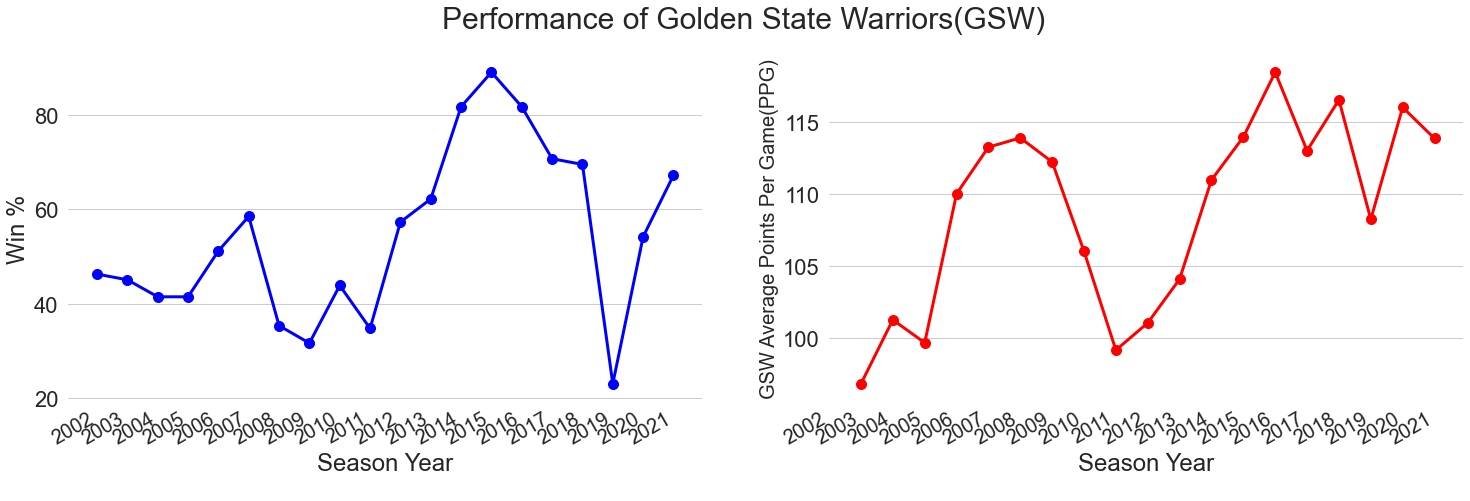

In [1076]:
fig, axes = plt.subplots(1,2, figsize=(25,7))
sns.set(style = 'whitegrid', font_scale = 2)
fig.suptitle('Performance of Golden State Warriors(GSW)', fontsize=30)
axes[0].xaxis.grid()
axes[1].xaxis.grid()
axes[0].plot(gsw_w.index, gsw_w['W_PCT']*100, color = 'blue', linewidth = 3, label = 'GSW win%', marker = '.', markersize = 20)
axes[1].plot(gsw_ppg_2_21.index, gsw_ppg_2_21, color = 'red', linewidth = 3, label = 'GSW mean ppg', marker = '.', markersize = 20)
axes[0].xaxis.set_ticks(np.arange(2002, 2022, 1))
plt.sca(axes[0])
plt.xticks(fontsize = 20)
axes[1].xaxis.set_ticks(np.arange(2002, 2022, 1))
plt.sca(axes[1])
plt.xticks(fontsize = 20)
fig.autofmt_xdate()
axes[0].set_ylabel('Win %')
axes[0].set_xlabel('Season Year')
axes[1].set_ylabel('GSW Average Points Per Game(PPG)',fontsize=20)
axes[1].set_xlabel('Season Year')


for i in range(2):
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)

In [1066]:
gsw_w.loc[[2015,2016,2017,2018,2019]]

,W_PCT
2015,0.890
2016,0.817
2017,0.707
2018,0.695
2019,0.231


In [1067]:
gsw_w.loc[[2015,2016,2017,2018]].mean()

W_PCT    0.77725
dtype: float64

Observing the first subplot, we can note the spike started in 2012 and reached its peak in 2015. After 2015(89%) it slightly decreased and for 2017-2018 period it stayed on 70% level. However in 2019, the trend drastically dropped to 23% level.In other words, for 2015-2018 time period the GSW average win-rate was 78% and in 2019 it suddenly dropped to 23%. We tried to justify this decrease by absence of NBA superstar Stephen Curry, who was injured in 2019 and almost skipped the whole 2019 season. 

On the 2nd subplot of the 1st graph, we can observe how GSW average PPG fluctuate around 115 ppg level for 2015-2018 period and then also drops in 2019. Answering to the 2nd part of the question, we may also answer to the question whether Stephen Curry influenced the 'points per game(ppg)' statistics of GSW.  We conducted the t-test taking GSW point per game statistics for 2015 and 2019 Seasons. We will take 2015 Year, when Stephen Curry was healthy and played the whole Season and 2019, when superstar was injured and skipped the 2019 Season.

Does Stephen Curry affected the points per game(ppg) Statistics of GSW?
*  H0:Stephen Curry has not influenced the GSW ppg.
*  H1:Stephen Curry has  influenced the GSW ppg.

We will take 2015 Year, when Stephen Curry was healthy and played the whole Season and vice versa 2019, when superstar was injured and skipped the 2019 Season.

In [1006]:
gsw_games_15 = games[games['SEASON'] == 2015]
gsw_games_19 = games[games['SEASON'] == 2019]

In [1017]:
gsw_ppg_15 = ppg(gsw_games_15, 'Golden State')[1]
gsw_ppg_19 = ppg(gsw_games_19, 'Golden State')[1]

In [1109]:
print(gsw_ppg_15.mean(), gsw_ppg_19.mean())
print(stats.ttest_ind(gsw_ppg_15, gsw_ppg_19))

113.96551724137932 108.24324324324324
Ttest_indResult(statistic=3.4354010866301605, pvalue=0.0007281044900098975)


**Result**: Ttest_indResult(statistic=3.4354010866301605, pvalue=0.0007281044900098975)

The calculated p-value is 0.00073 which means that we should accept the **H1:Alternative Hypothesis**.


2. **What is the relationship between the mean game-time of Stephen Carry and win-rate of GSW for each season between 2009-2021.**

Now, we will see how NBA Superstar Stephen Curry affected the performance of Golden State Warriors in terms of linear relation or correlation between player average game time and the Win Rate of GSW for each Season.

In [665]:
games_det = games_det.drop_duplicates(subset=["GAME_ID", "PLAYER_NAME"])

In [666]:
stephen = games_det[games_det["PLAYER_NAME"] == "Stephen Curry"]
stephen.drop(["TEAM_ID", "TEAM_CITY", "PLAYER_ID", "PLAYER_NAME", "COMMENT"], axis=1, inplace=True)

In [667]:
stephen['MIN'].fillna(0, inplace = True)
stephen['MIN'].str.split(':')
stephen['MIN'] = stephen['MIN'].apply(lambda x: str(x).split(':')[0]).astype('int64')

In [700]:
games_d = games[["GAME_DATE_EST", "GAME_ID", "SEASON"]]
stats = stephen.merge(games_d, on="GAME_ID", how="left")
seasonal_stats = stats.groupby("SEASON").sum()

In [701]:
gsw = ranking[ranking['TEAM'] == 'Golden State'][ranking['SEASON_ID'] > 22008]
gsw_g = gsw.groupby('SEASON_ID').nth(1)[['G']]
gsw_g.index = [x for x in range(2009, 2022, 1)]
gsw_g.index.name='SEASON'
gsw_w = gsw_w.loc[2009:]
gsw_w.index.name='SEASON'

In [703]:
seasonal_stats = seasonal_stats.join(gsw_g)
steph_mean_seasonal_stats = seasonal_stats[['MIN', 'PTS']].div(seasonal_stats.G, axis=0)
steph_mean_seasonal_stats = steph_mean_seasonal_stats.join(gsw_w)

In [725]:
steph_mean_seasonal_stats.corr(method ='pearson')

,MIN,PTS,W_PCT
MIN,1.000000,0.883796,0.702325
PTS,0.883796,1.000000,0.880086
W_PCT,0.702325,0.880086,1.000000


Here we can observe the correlation values between 3 features which are Stephen Curry Average game time('MIN'), Average Point per Game(PPG)('PTS') and GSW Win Rate(W_PCT) for each Season. The correlation value between 'MIN' and 'W_PCT' is 0.702325, which indicates strong correlation. Furthermore, there is strong correlation between 'MIN' and 'PTS', which means Stephen Curry scores more and more points, as he keep staying on a court.

Text(0.5, 1.0, "The linear relation between Stephen's mean game-time and GSW Win% for 2009-2021 period")

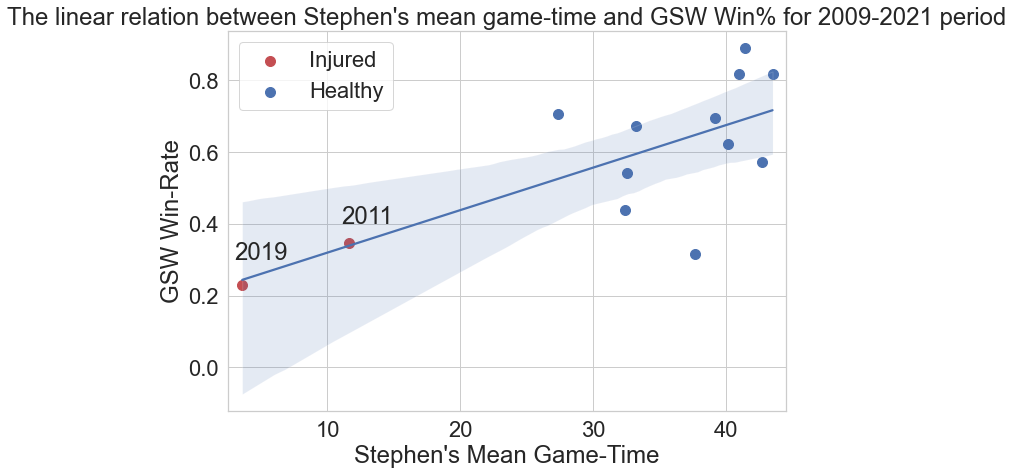

In [1083]:
plt.figure(figsize = (10,7))
plt.scatter(x = steph_mean_seasonal_stats.loc[[2011,2019]]['MIN'], 
            y = steph_mean_seasonal_stats.loc[[2011,2019]]['W_PCT'], 
            c = 'r',
            s = 100)
plt.scatter(x = steph_mean_seasonal_stats.drop([2011,2019])['MIN'], 
            y = steph_mean_seasonal_stats.drop([2011,2019])['W_PCT'], 
            c = 'b',
            s = 100)
plt.gca().legend(('Injured','Healthy'))
sns.regplot(data = steph_mean_seasonal_stats, x = 'MIN', y = 'W_PCT', scatter = False)
plt.ylabel('GSW Win-Rate')
plt.xlabel('Stephen\'s Mean Game-Time')
plt.annotate('2011', xy=(11, 0.4))
plt.annotate('2019', xy=(3, 0.3))


plt.xlim(2.5,44.5)
plt.title('The linear relation between Stephen\'s mean game-time and GSW Win% for 2009-2021 period')


Analyzing the graph, we observe the positive correlation between Stephen's Mean Game Time and GSW Win Rate. As Stephen Curry spends more time on a court, he also increases the chance of GSW winning the game. It can be seen that in 2011 and 2019, when he almost skipped these seasons and average player game time is low, GSW win rate is 0.348 and 0.231 respectively. On the other hand, when Stephen Curry is healthy and spend on average 37.377 min on court, GSW has on average 0.644 Win-Rate. 

In [829]:
steph_mean_seasonal_stats

,MIN,PTS,W_PCT
SEASON,,,
2009,37.670732,18.036585,0.317
2010,32.414634,18.060976,0.439
2011,11.651515,6.242424,0.348
2012,42.707317,25.792683,0.573
2013,40.134146,26.170732,0.622
2014,43.500000,31.890244,0.817
2015,41.451220,35.939024,0.890
2016,40.951220,31.878049,0.817
2017,27.378049,22.085366,0.707


In [1086]:
steph_mean_seasonal_stats.drop([2011,2019])['MIN'].mean()

37.37745676642655

In [1087]:
steph_mean_seasonal_stats.drop([2011,2019])['W_PCT'].mean()

0.6446363636363637

3. **How had the trend of average 3-point field goal(%) adjusted from 2014 to 2021 for Golden State Warriors and Cleveland, and what is difference between GSW(2015) and GSW(2019) in 3-point field goal(%)**

Stephen Curry became NBA superstar for his high efficiency in 3-point field goals and he started playing at such level from 2014. So we want to see what GSW 3-point field goal(%) trend experienced for 2014-2021 period.For a more general view of GSW performance in 3-point field goals Statisics, we added other leading team in this time period, which are Cleveland Cavaliers.In 2015-2018, there was a greates rivalry between two leading teams: GSW and Cleveld Cavaliers.

* Leading Teams: Cleveland Cavaliers(won 2016' Championship and 2015', 2017', 2018' Finalists)
* Golden State Warriors(won 2015', 2017' and 2018' Championship)

In [922]:
games_14_21 = games[(games['SEASON']>2013)&(games['SEASON']<2022)]

In [1113]:
def three_pt_fg(df, team):
    team_games_h = df[(df['HOME_TEAM_ID'] == team)]
    team_games_h = team_games_h[['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID','SEASON', 'FG3_PCT_home']]
    team_games_v = df[(df['VISITOR_TEAM_ID'] == team)]
    team_games_v = team_games_v[['GAME_DATE_EST', 'GAME_ID','VISITOR_TEAM_ID', 'SEASON', 'FG3_PCT_away']]

    team_games_h = team_games_h.rename(columns={'HOME_TEAM_ID': 'TEAM', 'FG3_PCT_home': 'FG3_PCT'})
    team_games_v = team_games_v.rename(columns={'VISITOR_TEAM_ID': 'TEAM','FG3_PCT_away': 'FG3_PCT' })

    team_games = pd.concat([team_games_h, team_games_h])
    season_games = team_games.groupby('SEASON').sum()/team_games.groupby('SEASON').count()
    return (season_games[['FG3_PCT']], team_games['FG3_PCT'])

In [1114]:
s_gsw_3pt = three_pt_fg(games_14_21, 'Golden State')[0]
s_cl_3pt = three_pt_fg(games_14_21, 'Cleveland')[0]
gsw_3pt = three_pt_fg(games_14_21, 'Golden State')[1]
cl_3pt = three_pt_fg(games_14_21, 'Cleveland')[1]

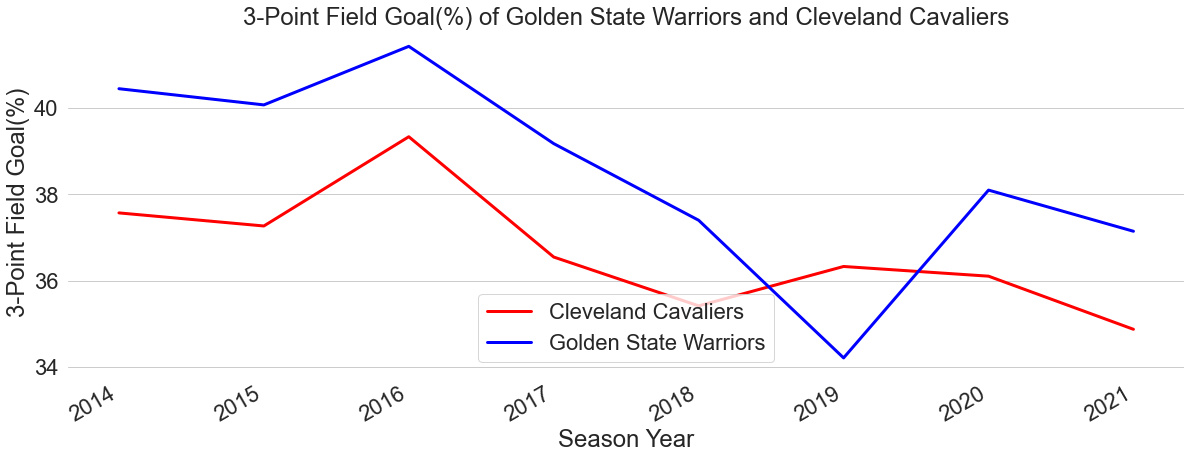

In [1101]:
fig, axes = plt.subplots(figsize=(20,7))
sns.set(style = 'whitegrid', font_scale = 2)
axes.xaxis.grid()
axes.plot(s_cl_3pt.index, s_cl_3pt['FG3_PCT']*100, color = 'red', linewidth = 3, label = 'Cleveland Cavaliers')
axes.plot(s_gsw_3pt.index, s_gsw_3pt['FG3_PCT']*100, color = 'blue', linewidth = 3, label = 'Golden State Warriors')
axes.xaxis.set_ticks(np.arange(2014, 2022, 1))
axes.set_ylabel('3-Point Field Goal(%)')
axes.set_xlabel('Season Year')
axes.set_title('3-Point Field Goal(%) of Golden State Warriors and Cleveland Cavaliers')

axes.legend(loc = 'lower center')
fig.autofmt_xdate()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)

Observing this graph, we can see GSW 3-Point Field Goal(%) trend fluctuates around 40% level for 2014-2017 period. In 2019 it reached its minimum with 0.342108 3pt-fg and then started to recover on next years.This decrease in 2019 can be explained by absence of Stephen Curry.In general the GSW trend is higher that Cleveland Cavaliers trend almost for the whole time period, except for 2019.

Does Stephen Curry affected the GSW 3-Point Field Goal(%) Statistics of GSW?
*  H0:Stephen Curry has not influenced the GSW 3-Point Field Goal(%).
*  H1:Stephen Curry has  influenced the GSW 3-Point Field Goal(%).

We will take 2015 Year, when Stephen Curry was healthy and played the whole Season and vice versa 2019, when superstar was injured and skipped the 2019 Season.

In [1115]:
gsw_games_15 = games[games['SEASON'] == 2015]
gsw_games_19 = games[games['SEASON'] == 2019]

In [1116]:
gsw_3pt_15 = three_pt_fg(gsw_games_15, 'Golden State')[1]
gsw_3pt_19 =  three_pt_fg(gsw_games_19, 'Golden State')[1]


In [1118]:
print(gsw_3pt_15.mean(), gsw_3pt_19.mean())
print(stats.ttest_ind(gsw_3pt_15, gsw_3pt_19))

0.4006724137931032 0.342108108108108
Ttest_indResult(statistic=4.876118314915706, pvalue=2.2959411564343997e-06)


**Result**: Ttest_indResult(statistic=4.876118314915706, pvalue=2.2959411564343997e-06)

The calculated p-value is 2.296e-06 which means that we should accept the **H1:Alternative Hypothesis** ->Stephen Curry has influenced the GSW 3-Point Field Goal(%).

## Conclusion

**Summary**

* Answering to the 1st question, we observed the significant decrease in GSW Win-Rate for 2019 Season and tried to justify this decrease by absence of NBA superstar Stephen Curry due to injury. We conducted a t-test taking team scored points per game(ppg) for 2015 and 2019 seasons, and got the p-value = 0.00073, which means Stephen Curry has influenced the GSW ppg.

* For the 2nd question, we researched the linear relation between Stephen's average game time and the Win Rate of GSW for each Season and received the correlation value 0.702325, which indicates as Stephen Curry spends more time on a court, he also increases the chance of GSW winning the game.

* In the 3rd question, we observed the decrease in GSW 3-Point Field Goal(%) for the 2019 Season and tried to justify this decrease by the absence of NBA superstar Stephen Curry due to injury. We conducted a t-test taking team 3-Point Field Goal(%) for 2015 and 2019 seasons, and got the p-value = 2.296e-06, which means Stephen Curry has influenced the GSW 3-Point Field Goal(%). Furthermore, we added the Cleveland Cavaliers 3-Point Field Goal(%) trend to see how well GSW performed in the NBA in terms of comparison to other leading team.

**Critique and How this can be done in a different way**

* In my research of 1 question, the hypothesis that was accepted is not fully reliable,as the sudden decrease of GSW in both win rate and average points per game also can be justified by other GSW superstars which left the team in 2019(ex. Kevin Durant).This problem can also be addressed in the 3rd question, where the GSW 3-Point Field Goal(%) trend was analyzed. It will be more appropriate if I would do more research on other high-efficient players in GSW and their average play time in each season.

* In the 2nd question, there is a problem with the validity of the 'MIN' feature, where Stephen's average play time for 2011 and 2019 seasons were 11.651515min and 3.584615min respectively. It will be inappropriate to claim that Stephen Curry played on average only 3 min or 11 min in major part of NBA games, because in these years(2011 and 2019) Stephen played only several games due to an injury. It would be better for graph reliability, if I replaced Stephen's average play time feature with Stephen's number of played games for each Season.

* In the 3rd question, leading Team was chosen because of Winning Championship Title history, however it is not a main indicator for a team to have a high 3-Point Field Goal(%).So the leading team can be chosen appropriately, if I would have done more research on 3-Point Field Goal(%) statistics for other teams.

